In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
import sys
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter
from matplotlib import pyplot as plt

In [2]:
img = im.open("DSS_Binarized/P168-Fg016-R-C01-R01-binarized.jpg")
wd, ht = img.size
print(wd, ht)

2706 3608


In [3]:
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []

for angle in angles:
    hist, score = find_score(img, angle)
    scores.append(score)
    

C:\Users\david\AppData\Local\Temp\ipykernel_8872\899130080.py:2: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)


In [4]:
best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {',(best_angle),'}')

Best angle: { 4 }


In [5]:
# correct skew
data = inter.rotate(img, best_angle, reshape=False, order=0)

C:\Users\david\AppData\Local\Temp\ipykernel_8872\2442634522.py:2: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(img, best_angle, reshape=False, order=0)


In [6]:
img = im.fromarray((255 * data).astype("uint8"))

In [7]:
img.save('skew_corrected.png')

In [8]:
data = plt.imread('skew_corrected.png')

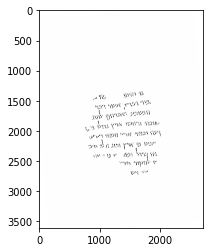

In [9]:
plt.imshow(data, interpolation='lanczos', cmap = "Greys")